In [69]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
import random
import math
import pylab as pl
from matplotlib.colors import ListedColormap
import time

dataset = pd.read_csv('ABBREV.csv', sep= ';', encoding ='cp1251')
dataset

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(Вµg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(Вµg),Folic_Acid_(Вµg),Food_Folate_(Вµg),Folate_DFE_(Вµg),Choline_Tot_ (mg),Vit_B12_(Вµg),Vit_A_IU,Vit_A_RAE,Retinol_(Вµg),Alpha_Carot_(Вµg),Beta_Carot_(Вµg),Beta_Crypt_(Вµg),Lycopene_(Вµg),Lut+Zea_ (Вµg),Vit_E_(mg),Vit_D_Вµg,Vit_D_IU,Vit_K_(Вµg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,BUTTER.WITH SALT,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24,0.02,2,24,24,643,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3,0,3,3,18.8,0.17,2499,684,671,0,158,0,0,0,2.32,0.0,0,7.0,51.368,21.021,3.043,215,5.00,"1 pat. (1"" sq. 1/3"" high)",14.2,1 tbsp,0.0
1,1002,BUTTER.WHIPPED.W/ SALT,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23,0.05,1,24,41,583,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4,0,4,4,18.8,0.07,2468,683,671,1,135,6,0,13,1.37,0.0,0,4.6,45.390,19.874,3.331,225,3.80,"1 pat. (1"" sq. 1/3"" high)",9.4,1 tbsp,0.0
2,1003,BUTTER OIL.ANHYDROUS,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4,0.00,0,3,5,2,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0,0,0,0,22.3,0.01,3069,840,824,0,193,0,0,0,2.80,0.0,0,8.6,61.924,28.732,3.694,256,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,CHEESE.BLUE,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528,0.31,23,387,256,1146,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36,0,36,36,15.4,1.22,721,198,192,0,74,0,0,0,0.25,0.5,21,2.4,18.669,7.778,0.800,75,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,CHEESE.BRICK,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674,0.43,24,451,136,560,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20,0,20,20,15.4,1.26,1080,292,286,0,76,0,0,0,0.26,0.5,22,2.5,18.764,8.598,0.784,94,132.00,1 cup. diced,113.0,1 cup. shredded,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,83110,MACKEREL.SALTED,43.00,305,18.50,25.10,13.40,0.00,0.0,0.00,66,1.40,60,254,520,4450,1.10,0.100,0.000,73.4,0.0,0.020,0.190,3.300,0.000,0.410,15,0,15,15,101.6,12.00,157,47,47,0,0,0,0,0,2.38,25.2,1006,7.8,7.148,8.320,6.210,95,80.00,"1 piece. (5-1/2"" x 1-1/2"" x 1/2"")",17.0,1 cubic inch. boneless,0.0
8786,90240,SCALLOP.(BAY&SEA).CKD.STMD,70.25,111,20.54,0.84,2.97,5.41,0.0,0.00,10,0.58,37,426,314,667,1.55,0.033,0.029,21.7,0.0,0.012,0.024,1.076,0.366,0.112,20,0,20,20,110.7,2.15,5,2,2,0,0,0,0,0,0.00,0.0,2,0.0,0.218,0.082,0.222,41,85.00,3 oz,0.0,0,0.0
8787,90480,SYRUP.CANE,26.00,269,0.00,0.00,0.86,73.14,0.0,73.20,13,3.60,10,8,63,58,0.19,0.020,0.000,0.7,0.0,0.130,0.060,0.100,0.000,0.000,0,0,0,0,0.0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0.0,0.000,0.000,0.000,0,21.00,1 serving,0.0,0,0.0
8788,90560,SNAIL.RAW,79.20,90,16.10,1.40,1.30,2.00,0.0,0.00,10,3.50,250,272,382,70,1.00,0.400,0.000,27.4,0.0,0.010,0.120,1.400,0.000,0.130,6,0,6,6,65.0,0.50,100,30,30,0,0,0,0,0,5.00,0.0,0,0.1,0.361,0.259,0.252,50,85.00,3 oz,0.0,0,0.0


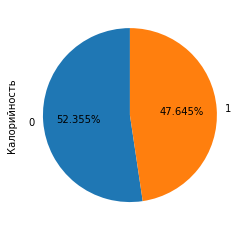

In [92]:
def func(row):
    return 1 if int(row[3]) > 200 else 0
 


dataset["Калорийность"] = dataset.apply(func, axis = 1)
dataset["Калорийность"].value_counts().plot.pie(autopct='%1.3f%%', startangle = 90)

In [0]:
def createData(df, dimentions,Class):
  data = []
  for index, row in df.iterrows():
      temp = [] 
      for i in range(len(dimentions)):
          temp.append(row[dimentions[i]])
      data.append([temp, int(row[Class])])

  print("Пример данных:", data[0])
  print("Кол-во данных:", len(data))
  return data

In [0]:
def showData(data):
  pl.scatter([data[i][0][0] for i in range(len(data))],
                 [data[i][0][1] for i in range(len(data))],
                 c=[data[i][1] for i in range(len(data))])
  pl.show() 

In [0]:
def splitData(data, persent):
  trainData = []
  testData  = []
  for row in data:
      if random.random() < persent:
          testData.append(row)
      else:
          trainData.append(row)
  print ("Длинна тестовой выборки:",len(testData))
  print ("Длинна тренировочной выборки:",len(trainData))
  return trainData, testData

In [0]:
def distEv (a, b):
  sum = 0
  for i in range(len(a)):
    sum += (a[i] - b[i])**2
  return math.sqrt(sum)

In [0]:
def distMa (a, b):
  sum = 0
  for i in range(len(a)):
    sum += abs(a[i] - b[i])
  return sum

In [0]:
def normalise(data):
    for i in range(len(data[0][0])):
        tempmax = 0
        for j in range(len(data)):
            tempmax = max(tempmax,data[j][0][i])
        for j in range(len(data)):
            data[j][0][i] /= tempmax
    return data 

In [0]:
def classifyKNN (trainData, testData, k, numberOfClasses, typeOfDist, normalisation):
    start_time = time.time()

    if (normalisation):
        trainData = normalise(trainData)
        testData = normalise(testData)

    #подсчет расстояния между точками
    testLabels = []	
    for testPoint in testData:
        #подсчет расстояния от текущей точки до всех остальных
        if (typeOfDist == 'Evklid'):
            testDist = [ [distEv(testPoint[0], trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        elif (typeOfDist == 'Manhattan'):
            testDist = [ [distMa(testPoint[0], trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        #сколько точек рядом каждого класса рядом с нашей точкой
        stat = [0 for i in range(numberOfClasses)]
        for d in sorted(testDist)[0:k]:
          stat[d[1]] += 1
        #присваивается самый часто встречающийся класс среди к ближайших
        testLabels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    delta_time = time.time() - start_time
    print ('Время выполнения: ', delta_time)
    return testLabels

In [0]:
def accCheck(testData,newTest):
  accuracy = 0
  for i in range(len(testData)):
    if testData[i][1] == newTest[i]:
      accuracy += 1
  accuracy /= len(testData)
  print("Точность предугадывания: ", accuracy)

1) евклидово расстояние между векторами без нормализации

Пример данных: [[717, 0.06, 215], 1]
Кол-во данных: 8790


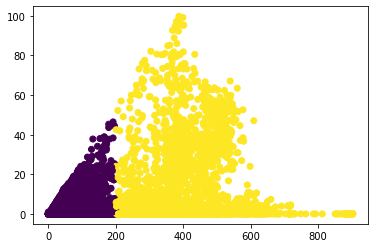

Длинна тестовой выборки: 1761
Длинна тренировочной выборки: 7029
Время выполнения:  35.836445569992065
Точность предугадывания:  0.9954571266325951


In [79]:
dimensions = ['Energ_Kcal','Sugar_Tot_(g)', 'Cholestrl_(mg)']
Class = "Углеводы"
testPercent = 0.2
k = 10
N = 2
Dist = 'Evklid'
norm = False
data = createData(dataset, dimensions, Class)
showData(data)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

2) манхэттенское расстояние без нормализации

In [93]:
dimensions = ['Energ_Kcal','Sugar_Tot_(g)', 'Cholestrl_(mg)']
Class = "Калорийность"
testPercent = 0.2
k = 10
N = 2
Dist = 'Manhattan'
norm = False
data = createData(dataset, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[717, 0.06, 215], 1]
Кол-во данных: 8790
Длинна тестовой выборки: 1795
Длинна тренировочной выборки: 6995
Время выполнения:  28.51757264137268
Точность предугадывания:  0.996100278551532


3) евклидово расстояние с нормализацией

In [94]:
dimensions = ['Energ_Kcal','Sugar_Tot_(g)', 'Cholestrl_(mg)']
Class = "Калорийность"
testPercent = 0.2
k = 10
N = 2
Dist = 'Evklid'
norm = True
data = createData(dataset, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[717, 0.06, 215], 1]
Кол-во данных: 8790
Длинна тестовой выборки: 1785
Длинна тренировочной выборки: 7005
Время выполнения:  28.755581617355347
Точность предугадывания:  0.9966386554621849


4) манхэттенское расстояние с нормализацией

In [95]:
dimensions = ['Energ_Kcal','Sugar_Tot_(g)', 'Cholestrl_(mg)']
Class = "Калорийность"
testPercent = 0.2
k = 10
N = 2
Dist = 'Manhattan'
norm = True
data = createData(dataset, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[717, 0.06, 215], 1]
Кол-во данных: 8790
Длинна тестовой выборки: 1793
Длинна тренировочной выборки: 6997
Время выполнения:  29.253816604614258
Точность предугадывания:  0.9960959286112661


Разница была минимальная, поэтому дальше буду исопрльзовать технического победителя -- евклидово без нормализации

10 соседей

In [96]:
dimensions = ['Energ_Kcal','Sugar_Tot_(g)', 'Cholestrl_(mg)']
Class = "Калорийность"
testPercent = 0.2
k = 10
N = 2
Dist = 'Evklid'
norm = False
data = createData(dataset, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[717, 0.06, 215], 1]
Кол-во данных: 8790
Длинна тестовой выборки: 1790
Длинна тренировочной выборки: 7000
Время выполнения:  33.996337890625
Точность предугадывания:  0.9949720670391061


20 соседей

In [97]:
dimensions = ['Energ_Kcal','Sugar_Tot_(g)', 'Cholestrl_(mg)']
Class = "Калорийность"
testPercent = 0.2
k = 20
N = 2
Dist = 'Evklid'
norm = False
data = createData(dataset, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[717, 0.06, 215], 1]
Кол-во данных: 8790
Длинна тестовой выборки: 1747
Длинна тренировочной выборки: 7043
Время выполнения:  33.37102818489075
Точность предугадывания:  0.9919862621637092


50 соседей

In [98]:
dimensions = ['Energ_Kcal','Sugar_Tot_(g)', 'Cholestrl_(mg)']
Class = "Калорийность"
testPercent = 0.2
k = 50
N = 2
Dist = 'Evklid'
norm = False
data = createData(dataset, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[717, 0.06, 215], 1]
Кол-во данных: 8790
Длинна тестовой выборки: 1756
Длинна тренировочной выборки: 7034
Время выполнения:  37.048001527786255
Точность предугадывания:  0.9914578587699316


200 cоседей

In [99]:
dimensions = ['Energ_Kcal','Sugar_Tot_(g)', 'Cholestrl_(mg)']
Class = "Калорийность"
testPercent = 0.2
k = 200
N = 2
Dist = 'Evklid'
norm = False
data = createData(dataset, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[717, 0.06, 215], 1]
Кол-во данных: 8790
Длинна тестовой выборки: 1766
Длинна тренировочной выборки: 7024
Время выполнения:  40.144264459609985
Точность предугадывания:  0.9898074745186863


500 соседей

In [100]:
dimensions = ['Energ_Kcal','Sugar_Tot_(g)', 'Cholestrl_(mg)']
Class = "Калорийность"
testPercent = 0.2
k = 500
N = 2
Dist = 'Evklid'
norm = False
data = createData(dataset, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[717, 0.06, 215], 1]
Кол-во данных: 8790
Длинна тестовой выборки: 1801
Длинна тренировочной выборки: 6989
Время выполнения:  40.694915771484375
Точность предугадывания:  0.9938922820655192


2000 cоседей

In [101]:
dimensions = ['Energ_Kcal','Sugar_Tot_(g)', 'Cholestrl_(mg)']
Class = "Калорийность"
testPercent = 0.2
k = 2000
N = 2
Dist = 'Evklid'
norm = False
data = createData(dataset, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[717, 0.06, 215], 1]
Кол-во данных: 8790
Длинна тестовой выборки: 1737
Длинна тренировочной выборки: 7053
Время выполнения:  39.98268938064575
Точность предугадывания:  0.9758203799654577


Качество начало ухудшаться с каждым большим значением, на 2000 особенно это заметно. Лучший вариант был с 10-20, но всё же 10 соседнй немного выигрывают.

На 2000 тысячах соседей алгоритм начал работать хуже.



Другие признаки

Пример данных: [[15.87, 81.11, 2.11], 1]
Кол-во данных: 8790


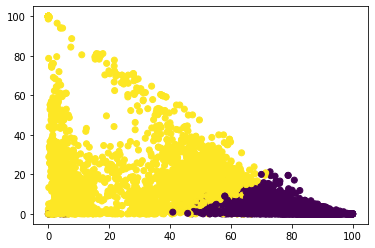

Длинна тестовой выборки: 1718
Длинна тренировочной выборки: 7072
Время выполнения:  38.22184705734253
Точность предугадывания:  0.9842840512223515


In [102]:
dimensions = ['Water_(g)','Lipid_Tot_(g)','Ash_(g)']
Class = "Калорийность"
testPercent = 0.2
k = 10
N = 2
Dist = 'Evklid'
norm = False
data = createData(dataset,dimensions,Class)
showData(data)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[0.06, 0.85, 15.87], 1]
Кол-во данных: 8790


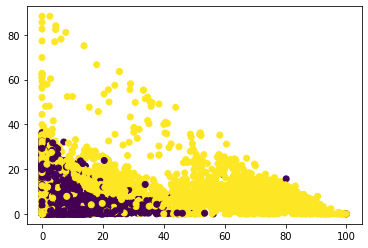

Длинна тестовой выборки: 1780
Длинна тренировочной выборки: 7010
Время выполнения:  36.36179733276367
Точность предугадывания:  0.9752808988764045


In [103]:
dimensions = ['Carbohydrt_(g)','Protein_(g)', 'Water_(g)']
Class = "Калорийность"
testPercent = 0.2
k = 10
N = 2
Dist = 'Evklid'
norm = False
data = createData(dataset,dimensions,Class)
showData(data)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[158, 0], 1]
Кол-во данных: 8790


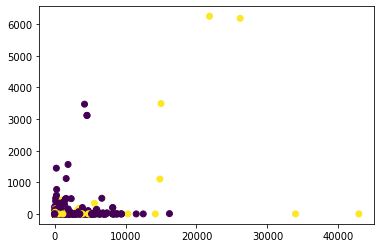

Длинна тестовой выборки: 1765
Длинна тренировочной выборки: 7025
Время выполнения:  30.202292919158936
Точность предугадывания:  0.5529745042492917


In [91]:
dimensions = ['Beta_Carot_(Вµg)',	'Beta_Crypt_(Вµg)']
Class = "Калорийность"
testPercent = 0.2
k = 10
N = 2
Dist = 'Evklid'
norm = False
data = createData(dataset,dimensions,Class)
showData(data)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Точность падает

In [0]:
dataset2 = pd.read_csv('ABBREV_with_classes.csv', sep = ';', encoding = 'cp1251')
dataset2

,NDB_No,CLASS,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(Вµg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(Вµg),Folic_Acid_(Вµg),Food_Folate_(Вµg),Folate_DFE_(Вµg),Choline_Tot_ (mg),Vit_B12_(Вµg),Vit_A_IU,Vit_A_RAE,Retinol_(Вµg),Alpha_Carot_(Вµg),Beta_Carot_(Вµg),Beta_Crypt_(Вµg),Lycopene_(Вµg),Lut+Zea_ (Вµg),Vit_E_(mg),Vit_D_Вµg,Vit_D_IU,Vit_K_(Вµg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,0,BUTTER.WITH SALT,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24,0.02,2,24,24,643,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3,0,3,3,18.8,0.17,2499,684,671,0,158,0,0,0,2.32,0.0,0,7.0,51.368,21.021,3.043,215,5.00,"1 pat. (1"" sq. 1/3"" high)",14.2,1 tbsp,0.0
1,1002,0,BUTTER.WHIPPED.W/ SALT,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23,0.05,1,24,41,583,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4,0,4,4,18.8,0.07,2468,683,671,1,135,6,0,13,1.37,0.0,0,4.6,45.390,19.874,3.331,225,3.80,"1 pat. (1"" sq. 1/3"" high)",9.4,1 tbsp,0.0
2,1003,10,BUTTER OIL.ANHYDROUS,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4,0.00,0,3,5,2,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0,0,0,0,22.3,0.01,3069,840,824,0,193,0,0,0,2.80,0.0,0,8.6,61.924,28.732,3.694,256,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,0,CHEESE.BLUE,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528,0.31,23,387,256,1146,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36,0,36,36,15.4,1.22,721,198,192,0,74,0,0,0,0.25,0.5,21,2.4,18.669,7.778,0.800,75,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,0,CHEESE.BRICK,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674,0.43,24,451,136,560,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20,0,20,20,15.4,1.26,1080,292,286,0,76,0,0,0,0.26,0.5,22,2.5,18.764,8.598,0.784,94,132.00,1 cup. diced,113.0,1 cup. shredded,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,83110,10,MACKEREL.SALTED,43.00,305,18.50,25.10,13.40,0.00,0.0,0.00,66,1.40,60,254,520,4450,1.10,0.100,0.000,73.4,0.0,0.020,0.190,3.300,0.000,0.410,15,0,15,15,101.6,12.00,157,47,47,0,0,0,0,0,2.38,25.2,1006,7.8,7.148,8.320,6.210,95,80.00,"1 piece. (5-1/2"" x 1-1/2"" x 1/2"")",17.0,1 cubic inch. boneless,0.0
8786,90240,10,SCALLOP.(BAY&SEA).CKD.STMD,70.25,111,20.54,0.84,2.97,5.41,0.0,0.00,10,0.58,37,426,314,667,1.55,0.033,0.029,21.7,0.0,0.012,0.024,1.076,0.366,0.112,20,0,20,20,110.7,2.15,5,2,2,0,0,0,0,0,0.00,0.0,2,0.0,0.218,0.082,0.222,41,85.00,3 oz,0.0,0,0.0
8787,90480,0,SYRUP.CANE,26.00,269,0.00,0.00,0.86,73.14,0.0,73.20,13,3.60,10,8,63,58,0.19,0.020,0.000,0.7,0.0,0.130,0.060,0.100,0.000,0.000,0,0,0,0,0.0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0.0,0.000,0.000,0.000,0,21.00,1 serving,0.0,0,0.0
8788,90560,10,SNAIL.RAW,79.20,90,16.10,1.40,1.30,2.00,0.0,0.00,10,3.50,250,272,382,70,1.00,0.400,0.000,27.4,0.0,0.010,0.120,1.400,0.000,0.130,6,0,6,6,65.0,0.50,100,30,30,0,0,0,0,0,5.00,0.0,0,0.1,0.361,0.259,0.252,50,85.00,3 oz,0.0,0,0.0


С использованием библиотеки

In [0]:
from sklearn.neighbors import KNeighborsClassifier

def skClassifyKNN (trainData, testData, k, normalisation):
    start_time = time.time()

    if (normalisation):
        trainData = normalise(trainData)
        testData = normalise(testData)
    X_train =[]
    Y_train = []
    for i in range(len(trainData)):
        X_train.append(trainData[i][0])
        Y_train.append(trainData[i][1])
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    
    X_test =[]
    Y_real = []
    for i in range(len(trainData)):
        X_test.append(trainData[i][0])
        Y_real.append(trainData[i][1])

    Y_pred = neigh.predict(X_test)
    delta_time = time.time() - start_time
    print ('Время выполнения: ', delta_time)
    percent = 0

    for i in range(len(Y_pred)):
        if (Y_pred[i] == Y_real[i]):
            percent += 1
    print("Точность предугадывания: ",percent/len(Y_pred))

In [118]:
dimensions = ['Protein_(g)','Iron_(mg)']
Class = "CLASS"
testPercent = 0.2
k = 10
norm = False
data = createData(dataset2, dimensions, Class)

trainData, testData = splitData(data, testPercent)
skClassifyKNN(trainData, testData, k, norm)

Пример данных: [[0.85, 0.02], 0]
Кол-во данных: 8790
Длинна тестовой выборки: 1689
Длинна тренировочной выборки: 7101
Время выполнения:  0.2111368179321289
Точность предугадывания:  0.7110266159695817


На разбиении со столбцом CLASS.

Евклидово без нормализации

In [120]:
dimensions = ['Protein_(g)','Iron_(mg)']
Class = "CLASS"
testPercent = 0.2
k = 20
N = 12
Dist = 'Manhattan'
norm = False
data = createData(dataset2, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[0.85, 0.02], 0]
Кол-во данных: 8790
Длинна тестовой выборки: 1777
Длинна тренировочной выборки: 7013
Время выполнения:  32.85100507736206
Точность предугадывания:  0.6539110861001688


Манхэттенское без нормализации

In [122]:
dimensions = ['Protein_(g)','Iron_(mg)']
Class = "CLASS"
testPercent = 0.2
k = 20
N = 12
Dist = 'Evklid'
norm = True
data = createData(dataset2, dimensions, Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[0.85, 0.02], 0]
Кол-во данных: 8790
Длинна тестовой выборки: 1729
Длинна тренировочной выборки: 7061
Время выполнения:  32.876078844070435
Точность предугадывания:  0.6419895893580104


Евклидово с нормализацией

In [123]:
dimensions = ['Protein_(g)','Iron_(mg)']
Class = "CLASS"
testPercent = 0.2
k = 20
N = 12
Dist = 'Manhattan'
norm = True
data = createData(dataset2,dimensions,Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[0.85, 0.02], 0]
Кол-во данных: 8790
Длинна тестовой выборки: 1813
Длинна тренировочной выборки: 6977
Время выполнения:  32.68424725532532
Точность предугадывания:  0.6618863761720905


Манхэттенское с нормализацией

In [125]:
dimensions = ['Protein_(g)','Iron_(mg)']
Class = "CLASS"
testPercent = 0.2
k = 20
N = 12
Dist = 'Manhattan'
norm = True
data = createData(dataset2,dimensions,Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[0.85, 0.02], 0]
Кол-во данных: 8790
Длинна тестовой выборки: 1820
Длинна тренировочной выборки: 6970
Время выполнения:  32.34946012496948
Точность предугадывания:  0.667032967032967


Cамым точным оказалось манхэттенское расстояние с нормализацией, будем использовать его

5 соседей

In [127]:
dimensions = ['Protein_(g)','Iron_(mg)']
Class = "CLASS"
testPercent = 0.2
k = 5
N = 12
Dist = 'Manhattan'
norm = True
data = createData(dataset2,dimensions,Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[0.85, 0.02], 0]
Кол-во данных: 8790
Длинна тестовой выборки: 1846
Длинна тренировочной выборки: 6944
Время выполнения:  34.269214153289795
Точность предугадывания:  0.5872156013001083


50 соседей

In [126]:
dimensions = ['Protein_(g)','Iron_(mg)']
Class = "CLASS"
testPercent = 0.2
k = 50
N = 12
Dist = 'Manhattan'
norm = True
data = createData(dataset2,dimensions,Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[0.85, 0.02], 0]
Кол-во данных: 8790
Длинна тестовой выборки: 1786
Длинна тренировочной выборки: 7004
Время выполнения:  34.016777753829956
Точность предугадывания:  0.6657334826427772


500 соседей

In [128]:
dimensions = ['Protein_(g)','Iron_(mg)']
Class = "CLASS"
testPercent = 0.2
k = 500
N = 12
Dist = 'Manhattan'
norm = True
data = createData(dataset2,dimensions,Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[0.85, 0.02], 0]
Кол-во данных: 8790
Длинна тестовой выборки: 1807
Длинна тренировочной выборки: 6983
Время выполнения:  33.8050639629364
Точность предугадывания:  0.6635307138904262


2000 соседей

In [129]:
dimensions = ['Protein_(g)','Iron_(mg)']
Class = "CLASS"
testPercent = 0.2
k = 2000
N = 12
Dist = 'Manhattan'
norm = True
data = createData(dataset2,dimensions,Class)
trainData, testData = splitData(data, testPercent)
newTest = classifyKNN(trainData, testData, k, N, Dist, norm)
accCheck(testData,newTest)

Пример данных: [[0.85, 0.02], 0]
Кол-во данных: 8790
Длинна тестовой выборки: 1805
Длинна тренировочной выборки: 6985
Время выполнения:  32.46781611442566
Точность предугадывания:  0.6742382271468144


Остановимся на 2000 соседей